In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
event_data = pd.read_csv('data/event_data_train.csv')

In [3]:
event_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [18]:
print(event_data['action'].unique(), '\n')
print(event_data['action'].nunique())

['viewed' 'passed' 'discovered' 'started_attempt'] 

4


In [22]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [30]:
event_data.isnull().sum()

step_id      0
timestamp    0
action       0
user_id      0
dtype: int64

In [32]:
event_data['date'] = pd.to_datetime(event_data['timestamp'], unit='s')

In [33]:
event_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [35]:
print(event_data['date'].max())
print(event_data['date'].min())

2018-05-19 23:33:31
2015-06-15 04:00:48


In [36]:
event_data['day_date'] = event_data['date'].dt.date

In [37]:
event_data.head()

,step_id,timestamp,action,user_id,date,day_date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


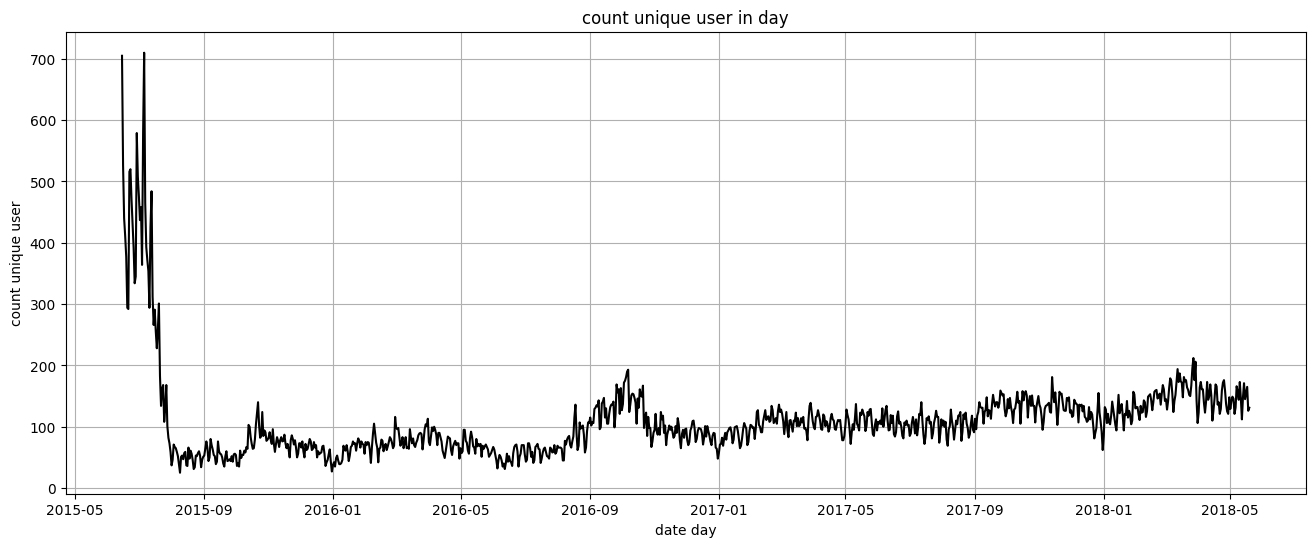

In [50]:
plt.figure(figsize=(16, 6))
plt.plot(event_data.groupby('day_date')['user_id'].nunique(), color='black')
plt.xlabel('date day')
plt.ylabel('count unique user')
plt.title('count unique user in day')
plt.grid();

In [73]:
passed_count_step = (event_data[event_data.action == 'passed']
                     .groupby('user_id')
                     .agg({'step_id': 'count'})
                     .rename(columns={'step_id': 'passed_count_step'}))

In [74]:
passed_count_step

,passed_count_step
user_id,
2,9
3,87
5,11
7,1
8,84
...,...
26789,2
26790,8
26794,69


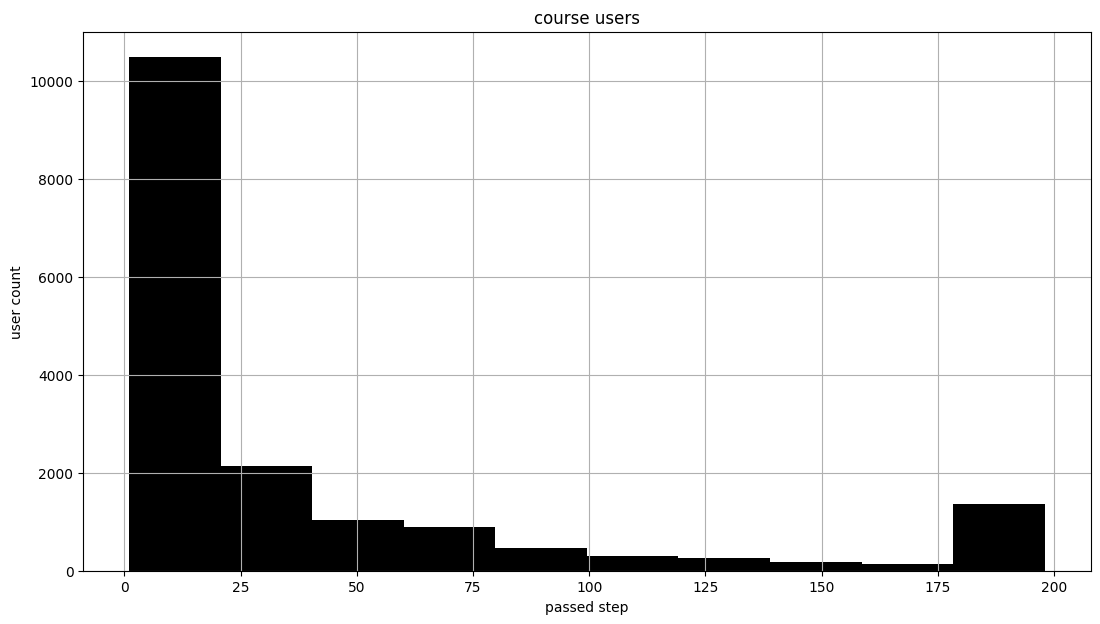

In [76]:
plt.figure(figsize=(13,7))
plt.hist(passed_count_step, color='black')
plt.ylabel('user count')
plt.xlabel('passed step')
plt.title('course users')
plt.grid();

In [87]:
viewed_count_step = (event_data[event_data.action == 'viewed']
                     .groupby('user_id')
                     .agg({'step_id': 'count'})
                     .rename(columns={'step_id': 'viewed_count_step'}))

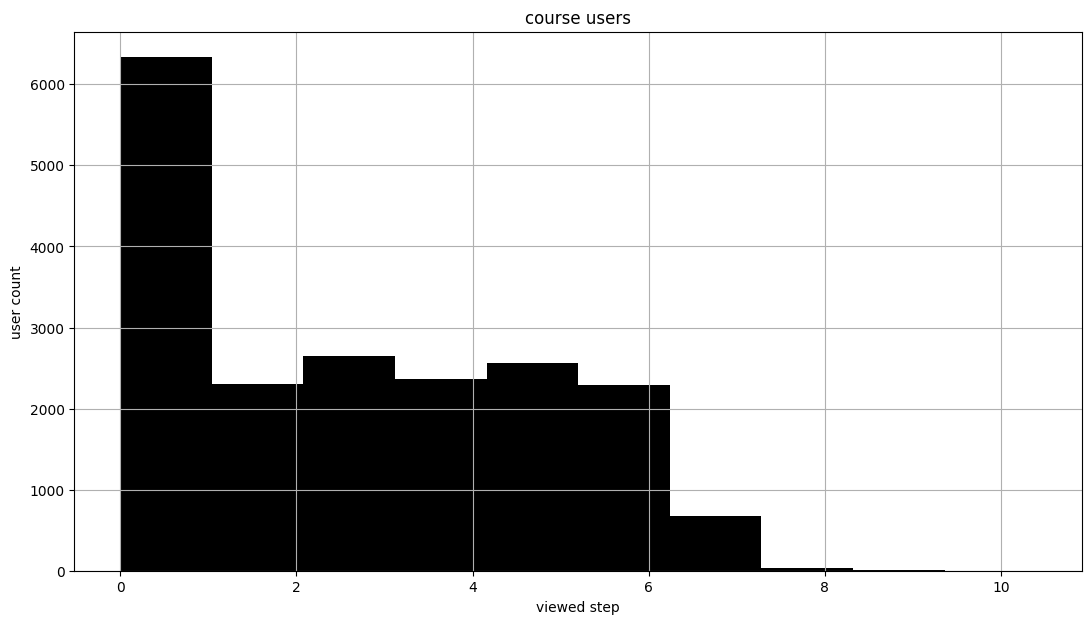

In [91]:
plt.figure(figsize=(13,7))
plt.hist(np.log(viewed_count_step), color='black')
plt.ylabel('user count')
plt.xlabel('viewed step')
plt.title('course users')
plt.grid();

In [89]:
print(passed_count_step.index.nunique())
print(event_data.user_id.nunique())
print(viewed_count_step.index.nunique())

17262
19234
19227


In [92]:
event_data.head()

,step_id,timestamp,action,user_id,date,day_date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


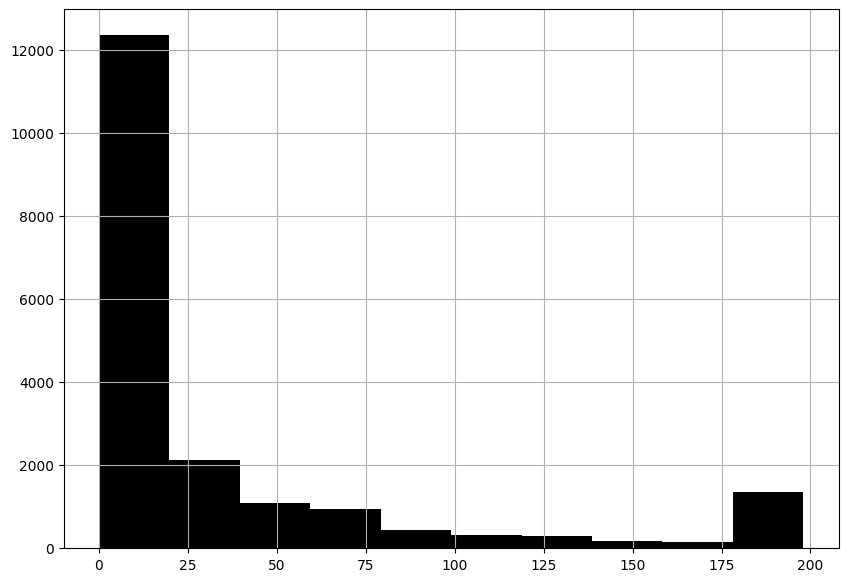

In [100]:
event_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)['passed'].hist(color='black', figsize=(10,7));